In [105]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [106]:
import warnings
warnings.filterwarnings("ignore")

In [107]:
# read csv file

df = pd.read_csv("loan.csv")

df.head(10)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False
5,CUST-00002287,LN00003606,Car Loan,83386,0.077232,13,Self-employed,Medium,472,Male,Divorced,PhD,17-03-2021,17-03-2021,29-03-2021,25-06-2021,False
6,CUST-00004571,LN00003372,Car Loan,38194,0.070929,26,Part-time,High,689,Male,Married,PhD,04-09-2021,21-09-2021,04-10-2021,18-12-2021,False
7,CUST-00002572,LN00002092,Car Loan,88498,0.046917,13,Part-time,Low,801,Female,Divorced,High School,17-04-2021,24-04-2021,07-05-2021,24-10-2021,False
8,CUST-00001416,LN00001061,Home Loan,45131,0.093456,22,Self-employed,Low,559,Male,Divorced,Master,16-10-2019,28-10-2019,29-10-2019,28-02-2020,False
9,CUST-00000009,LN00003352,Education Loan,61263,0.099123,56,Self-employed,Low,430,Male,Divorced,PhD,07-08-2021,25-08-2021,01-09-2021,09-02-2022,False


# Descriptive Analysis

In [108]:
# show columns in dataframe

df.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [109]:
# dimensions of the dataframe, (rows, columns)

df.shape

(5000, 17)

In [194]:
# remove unwanted columns
# needed columns added into new dataframe

drop_col = ['customer_id', 'loan_id', 'application_date', 'approval_date', 'disbursement_date', 'due_date']

df1 = df.drop(drop_col, axis = 1)

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False


In [195]:
# show columns in new dataframe

df1.shape

(5000, 11)

In [196]:
# dimensions of the new dataframe, (rows, columns)

df1.columns

Index(['loan_type', 'loan_amount', 'interest_rate', 'loan_term',
       'employment_type', 'income_level', 'credit_score', 'gender',
       'marital_status', 'education_level', 'default_status'],
      dtype='object')

In [197]:
# information about the categories, rows, missing values and data type

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_type        5000 non-null   object 
 1   loan_amount      5000 non-null   int64  
 2   interest_rate    5000 non-null   float64
 3   loan_term        5000 non-null   int64  
 4   employment_type  5000 non-null   object 
 5   income_level     5000 non-null   object 
 6   credit_score     5000 non-null   int64  
 7   gender           5000 non-null   object 
 8   marital_status   5000 non-null   object 
 9   education_level  5000 non-null   object 
 10  default_status   5000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 395.6+ KB


In [198]:
# statistics for numerical columns/variables

df1.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [199]:
# total number of times for each category under the categorical variable 

df1['default_status'].value_counts()

False    4001
True      999
Name: default_status, dtype: int64

In [115]:
# checking total empty values in each column/variable

df1.isnull().sum()

loan_type          0
loan_amount        0
interest_rate      0
loan_term          0
employment_type    0
income_level       0
credit_score       0
gender             0
marital_status     0
education_level    0
default_status     0
dtype: int64

In [116]:
# correlation between numerical variables

df1.corr()

,loan_amount,interest_rate,loan_term,credit_score,default_status
loan_amount,1.000000,-0.017317,0.004763,-0.004780,-0.007309
interest_rate,-0.017317,1.000000,-0.014311,0.016064,0.028963
loan_term,0.004763,-0.014311,1.000000,-0.023735,-0.012358
credit_score,-0.004780,0.016064,-0.023735,1.000000,-0.007346
default_status,-0.007309,0.028963,-0.012358,-0.007346,1.000000


In [117]:
# Fill any missing values
# Numeric columns: fill with median
df1 = df1.fillna(df.median(numeric_only=True))

In [118]:
# Encode categorical columns
# Identify which columns are categorical (object type)
categorical_cols = df1.select_dtypes(include=['object']).columns
categorical_cols

Index(['loan_type', 'employment_type', 'income_level', 'gender',
       'marital_status', 'education_level'],
      dtype='object')

In [119]:
# Fill categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])    

# Spread of Data

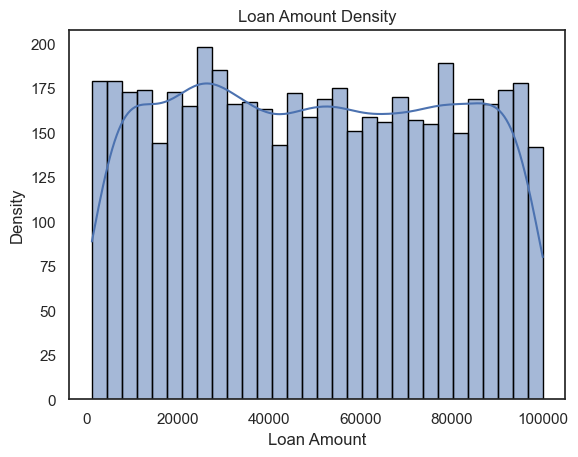

In [121]:
# distribution plot for numerical variable
# variable is about symmetric

# sns.set_theme(style="white")
# sns.distplot(df1['loan_amount'])

sns.histplot(df1['loan_amount'], kde=True, bins=30,edgecolor="black")
plt.title('Loan Amount Density')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

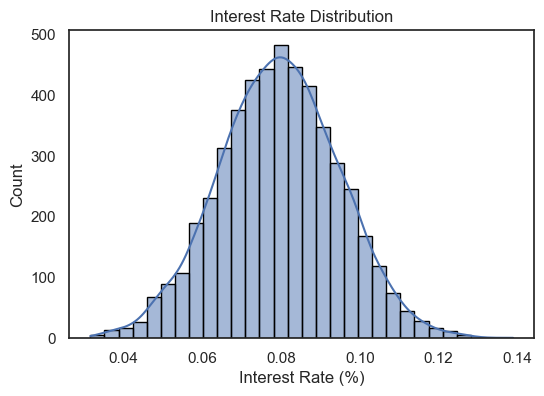

In [122]:
# distribution plot for numerical variable
# variable is symmetric

# sns.distplot(df1['interest_rate'])

plt.figure(figsize=(6,4))
sns.histplot(df1['interest_rate'], kde=True, bins=30, edgecolor="black")
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Count')
plt.show()

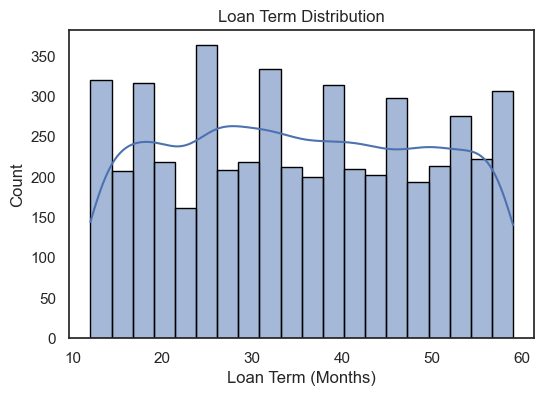

In [123]:
# distribution plot for numerical variable
# variable is about symmetric

# sns.distplot(df1['loan_term'])

plt.figure(figsize=(6,4))
sns.histplot(df1['loan_term'], kde=True, bins=20, edgecolor="black")
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.show()

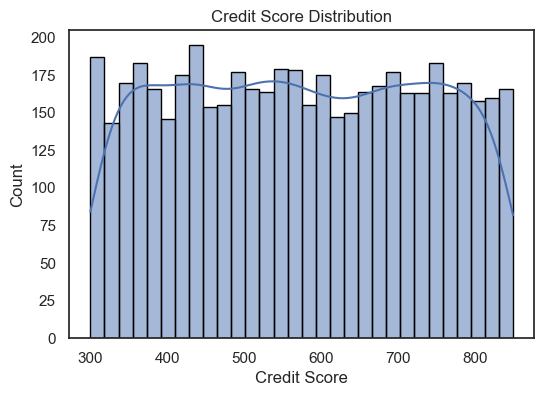

In [124]:
# distribution plot for numerical variable
# variable is about symmetric

# sns.distplot(df1['credit_score'])

plt.figure(figsize=(6,4))
sns.histplot(df1['credit_score'], kde=True, bins=30, edgecolor="black")
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

# Exploratory Data Analysis (EDA)

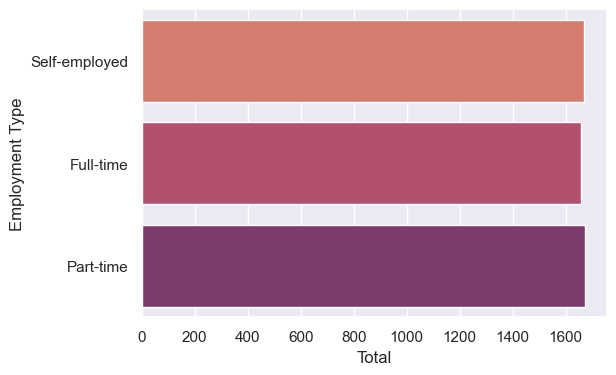

In [125]:
# bar graph for categories of categorical variable
# shows the total number for each category under the categorical variable

# sns.countplot(x='employment_type', data=df1)
# plt.title('Employment Type Distribution')
# plt.xlabel('Employment Type')
# plt.ylabel('Count')
# plt.show()

plt.figure(figsize=(6,4))
sns.set_theme(style="darkgrid")
sns.countplot(y="employment_type", data=df1, palette="flare")
plt.ylabel('Employment Type')
plt.xlabel('Total')
plt.show()

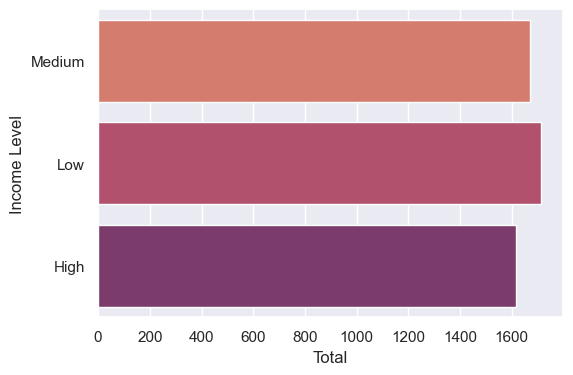

In [126]:
# bar graph for categories of categorical variable
# shows the total number for each category under the categorical variable

plt.figure(figsize=(6,4))
sns.set_theme(style="darkgrid")
sns.countplot(y="income_level", data=df1, palette="flare")
plt.ylabel('Income Level')
plt.xlabel('Total')
plt.show()

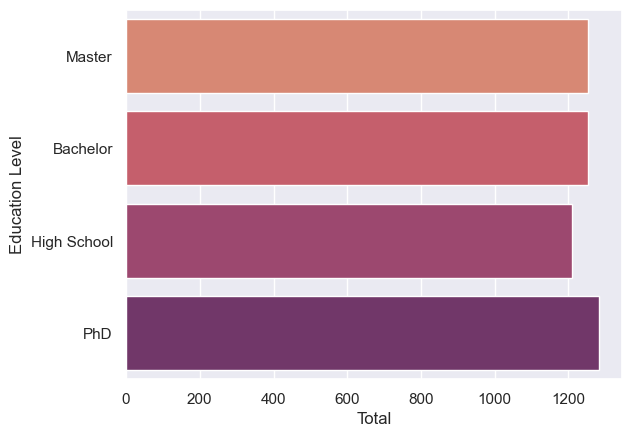

In [127]:
# bar graph for categories of categorical variable
# shows the total number for each category under the categorical variable

sns.set_theme(style="darkgrid")
sns.countplot(y="education_level", data=df1, palette="flare")
plt.ylabel('Education Level')
plt.xlabel('Total')
plt.show()

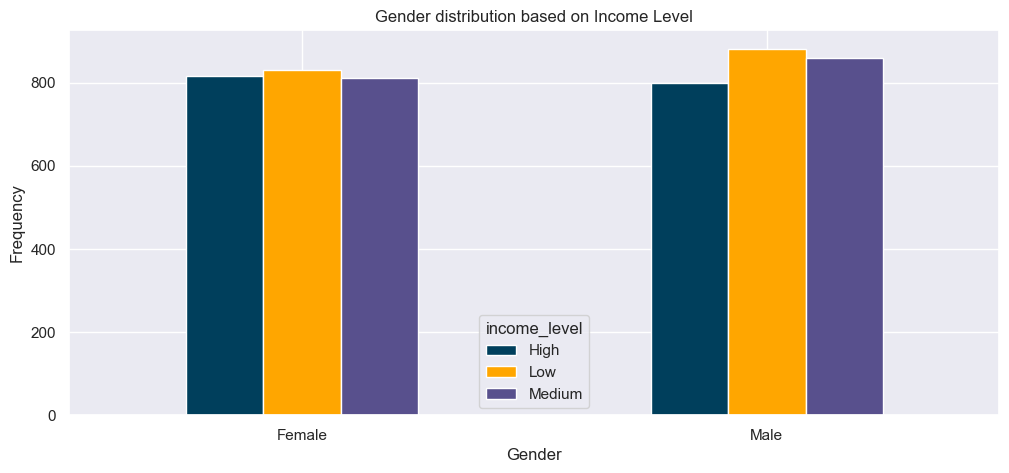

In [128]:
# column graph for gender based on income level

pd.crosstab(df1.gender,df1.income_level).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d'])
plt.title('Gender distribution based on Income Level')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

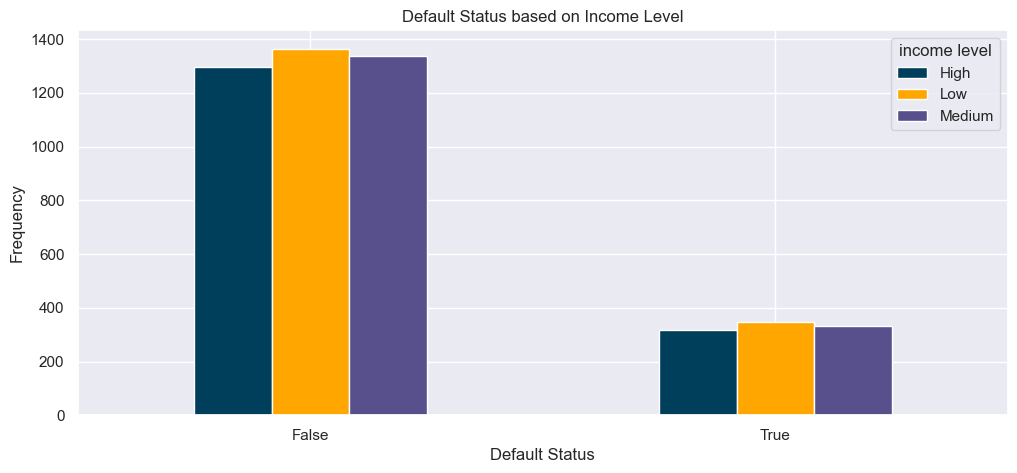

In [129]:
# column graph for default status(target variable) based on income level

pd.crosstab(df1.default_status,df1.income_level).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d'])
plt.title('Default Status based on Income Level')
plt.xlabel('Default Status')
plt.legend(title= 'income level')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

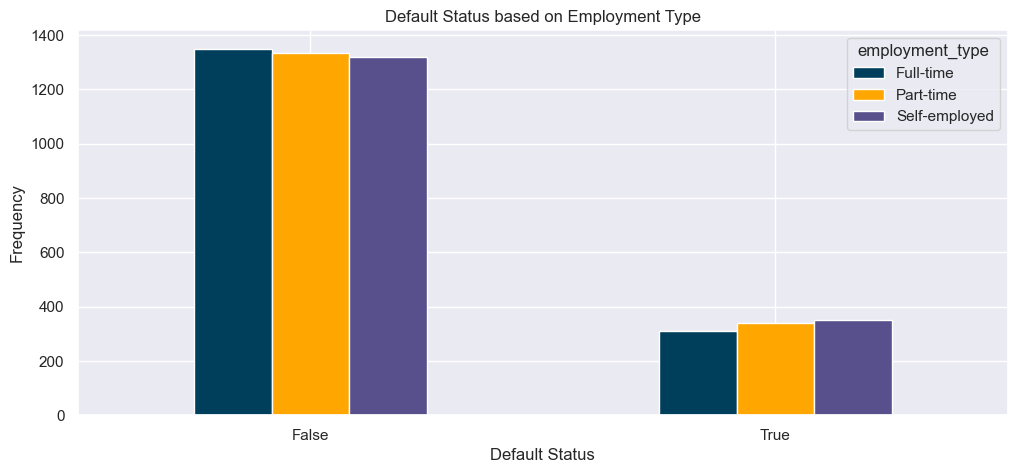

In [130]:
# column graph for default status based on employment type

pd.crosstab(df1.default_status,df1.employment_type).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d'])
plt.title('Default Status based on Employment Type')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

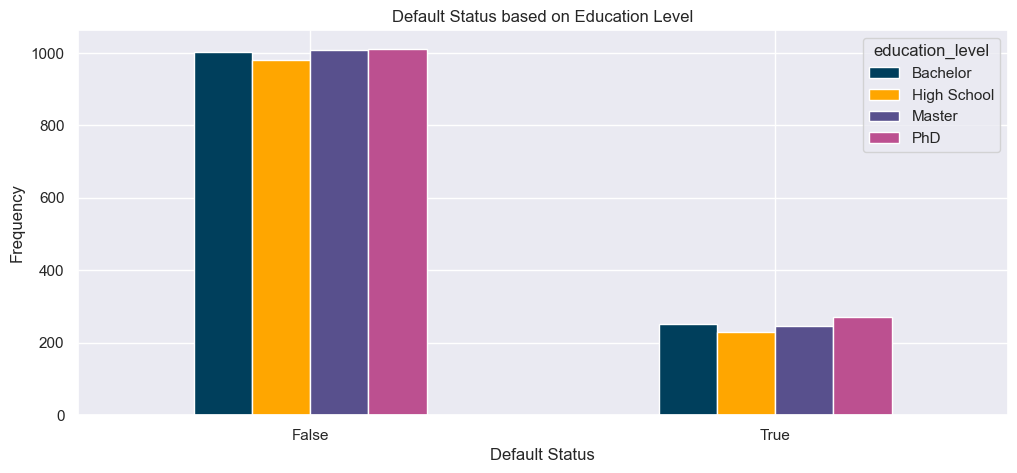

In [131]:
# column graph for default status based on education type

pd.crosstab(df1.default_status,df1.education_level).plot(kind="bar",figsize=(12,5), color=['#003f5c','#ffa600','#58508d','#bc5090'])
plt.title('Default Status based on Education Level')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

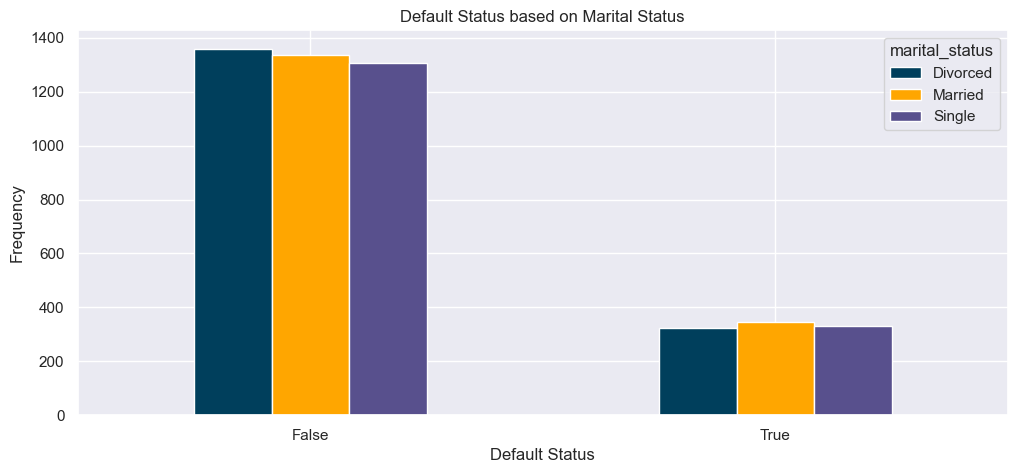

In [132]:
# column graph for default status based on marital status

pd.crosstab(df1.default_status,df1.marital_status).plot(kind="bar",figsize=(12,5), color=['#003f5c','#ffa600','#58508d'])
plt.title('Default Status based on Marital Status')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

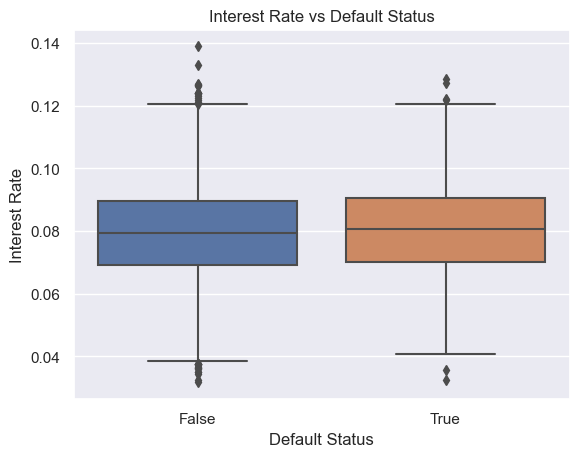

In [133]:
# boxplot for interest rate vs default status

sns.boxplot(x = 'default_status', y = 'interest_rate', data = df1)
plt.xlabel('Default Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs Default Status')
plt.show()

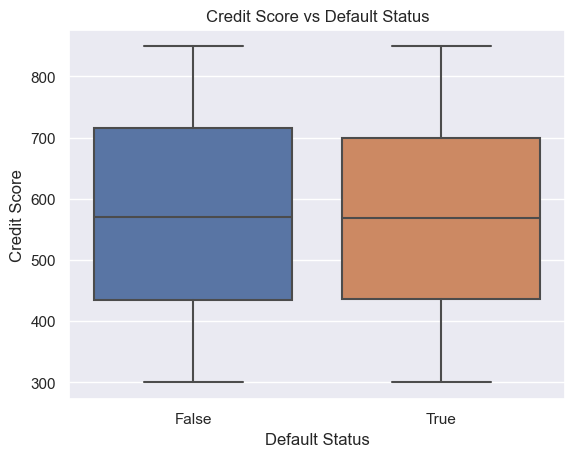

In [134]:
# boxplot for credit score vs default status

sns.boxplot(x = 'default_status', y = 'credit_score', data = df1)
plt.xlabel('Default Status')
plt.ylabel('Credit Score')
plt.title('Credit Score vs Default Status')
plt.show()

# Data Preparation

In [135]:
# view first few rows

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False


In [136]:
# Converting text to integer
# loan_type column: 
# Car Loan - 1
# Personal Loan - 2
# Home Loan - 3
# Education Loan - 4

df1['loan_type'] = df1['loan_type'].map({ "Car Loan": 1, "Personal Loan": 2, 
                                       "Home Loan": 3, "Education Loan": 4})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,2,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,2,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,1,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,3,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False


In [137]:
# Converting text to integer
# marital_status column: 
# Single - 1
# Married - 2
# Divorced - 3

df1['marital_status'] = df1['marital_status'].map({ "Single": 1, "Married": 2, "Divorced": 3})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,Male,1,Master,False
1,2,1860,0.089296,56,Full-time,Medium,776,Female,2,Bachelor,False
2,2,77820,0.070470,51,Full-time,Low,697,Male,3,High School,False
3,1,55886,0.062155,30,Full-time,Low,795,Female,2,PhD,False
4,3,7265,0.070635,48,Part-time,Low,519,Female,2,High School,False


In [138]:
# Converting text to integer
# gender column: 
# Male - 1
# Female - 2

df1['gender'] = df1['gender'].map({'Male': 1, 'Female': 2})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,1,1,Master,False
1,2,1860,0.089296,56,Full-time,Medium,776,2,2,Bachelor,False
2,2,77820,0.070470,51,Full-time,Low,697,1,3,High School,False
3,1,55886,0.062155,30,Full-time,Low,795,2,2,PhD,False
4,3,7265,0.070635,48,Part-time,Low,519,2,2,High School,False


In [139]:
# Converting text to integer
# education_level column: 
# High School - 1
# Bachelor - 2
# Master - 3
# PhD - 4

df1['education_level'] = df1['education_level'].map({ "PhD": 4, "Master": 3, 
                                                     "Bachelor": 2, "High School": 1})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,1,1,3,False
1,2,1860,0.089296,56,Full-time,Medium,776,2,2,2,False
2,2,77820,0.070470,51,Full-time,Low,697,1,3,1,False
3,1,55886,0.062155,30,Full-time,Low,795,2,2,4,False
4,3,7265,0.070635,48,Part-time,Low,519,2,2,1,False


In [140]:
# Converting text to integer
# employment_type column: 
# Self-employed - 1
# Part-time - 2
# Full-time - 3

df1['employment_type'] = df1['employment_type'].map({ "Full-time": 3, "Part-time": 2, 
                                                   "Self-employed": 1})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,1,Medium,833,1,1,3,False
1,2,1860,0.089296,56,3,Medium,776,2,2,2,False
2,2,77820,0.070470,51,3,Low,697,1,3,1,False
3,1,55886,0.062155,30,3,Low,795,2,2,4,False
4,3,7265,0.070635,48,2,Low,519,2,2,1,False


In [141]:
# Converting text to integer
# income_level column: 
# Low - 1
# Medium - 2
# High - 3

df1["income_level"] = df1["income_level"].map({ "Low": 1, "Medium": 2, "High": 3})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,1,2,833,1,1,3,False
1,2,1860,0.089296,56,3,2,776,2,2,2,False
2,2,77820,0.070470,51,3,1,697,1,3,1,False
3,1,55886,0.062155,30,3,1,795,2,2,4,False
4,3,7265,0.070635,48,2,1,519,2,2,1,False


In [142]:
# Converting true/false (boolean) text to integer
# default_status column: 
# False - 0
# True - 1

df1["default_status"] = df1["default_status"].astype(int)

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,1,2,833,1,1,3,0
1,2,1860,0.089296,56,3,2,776,2,2,2,0
2,2,77820,0.070470,51,3,1,697,1,3,1,0
3,1,55886,0.062155,30,3,1,795,2,2,4,0
4,3,7265,0.070635,48,2,1,519,2,2,1,0


# Modelling

In [145]:
# separate into train and test fror non-target variables
# and target variables
# 70 % train 30% test

X = df1.drop(["default_status"], axis=1)
y = df1["default_status"]

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [147]:
# Scaling:
# All features are on a similar scale and avoid bias. 
# Standardizes numeric inputs so no feature dominates just because it has bigger numbers.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [148]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.81
Confusion Matrix:
 [[1215    0]
 [ 285    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500



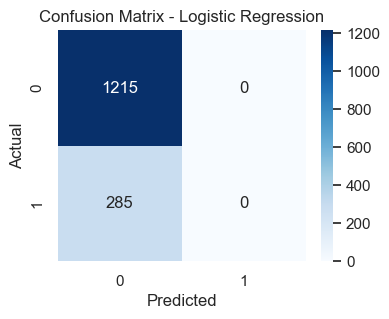

In [162]:
#            Predicted
#            | 0 | 1 |
#          -------------
# Actual  0 | TN | FP |
#          -------------
# Actual  1 | FN | TP |

# TN: True Negative
# FP: False Positive
# FN: False Negative
# TP: True Positive

# Actuals are y-test
# Heatmap

# Get confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot heatmap
plt.figure(figsize=(4,3))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [175]:
# Balanced Logistic Regression
lr_bal = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,     # More iterations for convergence
    random_state=42
)

# Fit the model
lr_bal.fit(X_train_scaled, y_train)

# Predict
y_pred_lr_bal = lr_bal.predict(X_test_scaled)

# Evaluate
print("Logistic Regression (Balanced) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_bal))

Logistic Regression (Balanced) Results:
Accuracy: 0.5206666666666667
Confusion Matrix:
 [[633 582]
 [137 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.52      0.64      1215
           1       0.20      0.52      0.29       285

    accuracy                           0.52      1500
   macro avg       0.51      0.52      0.46      1500
weighted avg       0.70      0.52      0.57      1500



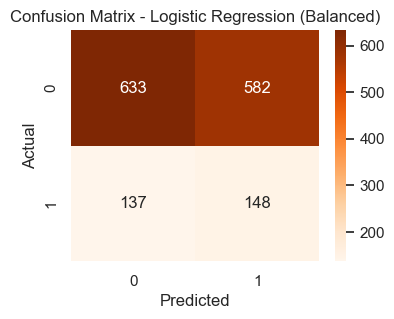

In [189]:
#            Predicted
#            | 0 | 1 |
#          -------------
# Actual  0 | TN | FP |
#          -------------
# Actual  1 | FN | TP |

# TN: True Negative
# FP: False Positive
# FN: False Negative
# TP: True Positive

# Actuals are y-test
# Heatmap

cm_lr_bal = confusion_matrix(y_test, y_pred_lr_bal)

plt.figure(figsize=(4,3))
sns.heatmap(cm_lr_bal, annot=True, fmt="d", cmap="Oranges")

plt.title("Confusion Matrix - Logistic Regression (Balanced)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree

In [159]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.8073333333333333
Confusion Matrix:
 [[1208    7]
 [ 282    3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1215
           1       0.30      0.01      0.02       285

    accuracy                           0.81      1500
   macro avg       0.56      0.50      0.46      1500
weighted avg       0.71      0.81      0.73      1500



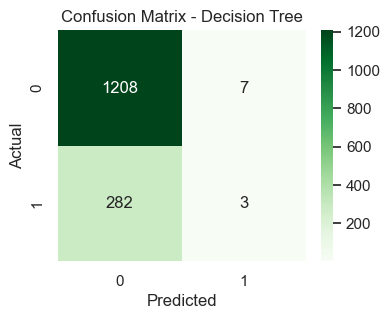

In [190]:
#            Predicted
#            | 0 | 1 |
#          -------------
# Actual  0 | TN | FP |
#          -------------
# Actual  1 | FN | TP |

# TN: True Negative
# FP: False Positive
# FN: False Negative
# TP: True Positive

# Actuals are y-test
# Heatmap

# Get confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot heatmap
plt.figure(figsize=(4,3))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [172]:
dt_bal = DecisionTreeClassifier(max_depth=4, class_weight="balanced", random_state=42)
dt_bal.fit(X_train, y_train)
y_pred_dt_bal = dt_bal.predict(X_test)

print("Decision Tree (Balanced) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_bal))

Decision Tree (Balanced) Results:
Accuracy: 0.398
Confusion Matrix:
 [[425 790]
 [113 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.35      0.48      1215
           1       0.18      0.60      0.28       285

    accuracy                           0.40      1500
   macro avg       0.48      0.48      0.38      1500
weighted avg       0.67      0.40      0.45      1500



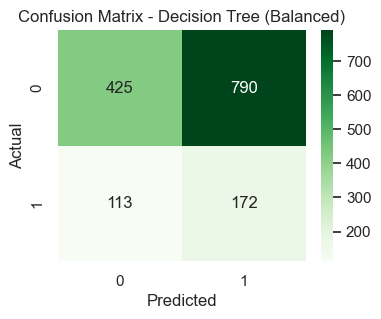

In [174]:
#            Predicted
#            | 0 | 1 |
#          -------------
# Actual  0 | TN | FP |
#          -------------
# Actual  1 | FN | TP |

# TN: True Negative
# FP: False Positive
# FN: False Negative
# TP: True Positive

# Actuals are y-test
# Heatmap

# Get confusion matrix
cm_dt_bal = confusion_matrix(y_test, y_pred_dt_bal)

# Plot heatmap
plt.figure(figsize=(4,3))
sns.heatmap(
    cm_dt_bal,
    annot=True,     # Show counts in the cells
    fmt="d",        # Format numbers as integers
    cmap="Greens"    # Color palette
)

plt.title("Confusion Matrix - Decision Tree (Balanced)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Support Vector Machine (SVM)

In [168]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.81
Confusion Matrix:
 [[1215    0]
 [ 285    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500



<Axes: >

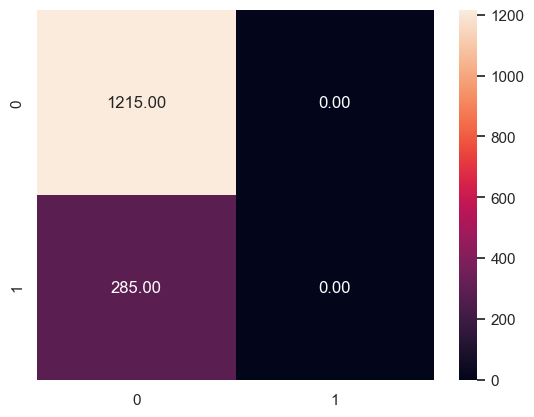

In [169]:
#            Predicted
#            | 0 | 1 |
#          -------------
# Actual  0 | TN | FP |
#          -------------
# Actual  1 | FN | TP |

# TN: True Negative
# FP: False Positive
# FN: False Negative
# TP: True Positive

# Actuals are y-test
# Heatmap

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot = True, fmt = '.2f')

In [170]:
svm = SVC(class_weight="balanced")
svm.fit(X_train_scaled, y_train)
y_pred_svm_bal = svm.predict(X_test_scaled)

print("SVM Results with Balanced Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_bal))

SVM Results with Balanced Class Weights:
Accuracy: 0.508
Confusion Matrix:
 [[625 590]
 [148 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.51      0.63      1215
           1       0.19      0.48      0.27       285

    accuracy                           0.51      1500
   macro avg       0.50      0.50      0.45      1500
weighted avg       0.69      0.51      0.56      1500



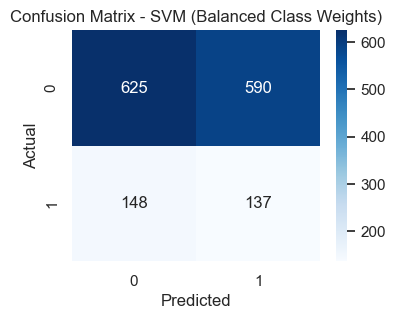

In [171]:
#            Predicted
#            | 0 | 1 |
#          -------------
# Actual  0 | TN | FP |
#          -------------
# Actual  1 | FN | TP |

# TN: True Negative
# FP: False Positive
# FN: False Negative
# TP: True Positive

# Actuals are y-test
# Heatmap

# Get confusion matrix
cm_svm_bal = confusion_matrix(y_test, y_pred_svm_bal)

# Plot heatmap
plt.figure(figsize=(4,3))
sns.heatmap(
    cm_svm_bal,
    annot=True,     # Show counts in the cells
    fmt="d",        # Format numbers as integers
    cmap="Blues"    # Color palette
)

plt.title("Confusion Matrix - SVM (Balanced Class Weights)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Comparision

In [165]:
# Compare accuracies

# accuracy_lr = accuracy_score(y_test, y_pred_lr)
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# accuracy_svm = accuracy_score(y_test, y_pred_svm)

# print("\nModel Comparison:")
# print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
# print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
# print(f"SVM Accuracy: {accuracy_svm:.2f}")

results = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
                        'Accuracy': [accuracy_score(y_test, y_pred_lr), 
                                     accuracy_score(y_test, y_pred_dt), 
                                     accuracy_score(y_test, y_pred_svm)]})

results['Accuracy'] = (results['Accuracy'] * 100).round(1)

results

,Model,Accuracy
0,Logistic Regression,81.0
1,Decision Tree,80.7
2,SVM,81.0


In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression (Unbalanced)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, zero_division=0)
rec_lr = recall_score(y_test, y_pred_lr, zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, zero_division=0)

# Decision Tree (Unbalanced)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, zero_division=0)
rec_dt = recall_score(y_test, y_pred_dt, zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, zero_division=0)

# SVM (Unbalanced)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, zero_division=0)
rec_svm = recall_score(y_test, y_pred_svm, zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, zero_division=0)

# Logistic Regression (Balanced)
acc_lr_bal = accuracy_score(y_test, y_pred_lr_bal)
prec_lr_bal = precision_score(y_test, y_pred_lr_bal, zero_division=0)
rec_lr_bal = recall_score(y_test, y_pred_lr_bal, zero_division=0)
f1_lr_bal = f1_score(y_test, y_pred_lr_bal, zero_division=0)

# Decision Tree (Balanced)
acc_dt_bal = accuracy_score(y_test, y_pred_dt_bal)
prec_dt_bal = precision_score(y_test, y_pred_dt_bal, zero_division=0)
rec_dt_bal = recall_score(y_test, y_pred_dt_bal, zero_division=0)
f1_dt_bal = f1_score(y_test, y_pred_dt_bal, zero_division=0)

# SVM (Balanced)
acc_svm_bal = accuracy_score(y_test, y_pred_svm_bal)
prec_svm_bal = precision_score(y_test, y_pred_svm_bal, zero_division=0)
rec_svm_bal = recall_score(y_test, y_pred_svm_bal, zero_division=0)
f1_svm_bal = f1_score(y_test, y_pred_svm_bal, zero_division=0)


results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "SVM",
        "Logistic Regression (Balanced)",
        "Decision Tree (Balanced)",
        "SVM (Balanced)"
    ],
    "Accuracy (%)": [
        round(acc_lr*100, 1),
        round(acc_dt*100, 1),
        round(acc_svm*100, 1),
        round(acc_lr_bal*100, 1),
        round(acc_dt_bal*100, 1),
        round(acc_svm_bal*100, 1)
    ],
    "Precision": [
        round(prec_lr, 2),
        round(prec_dt, 2),
        round(prec_svm, 2),
        round(prec_lr_bal, 2),
        round(prec_dt_bal, 2),
        round(prec_svm_bal, 2)
    ],
    "Recall": [
        round(rec_lr, 2),
        round(rec_dt, 2),
        round(rec_svm, 2),
        round(rec_lr_bal, 2),
        round(rec_dt_bal, 2),
        round(rec_svm_bal, 2)
    ],
    "F1-score": [
        round(f1_lr, 2),
        round(f1_dt, 2),
        round(f1_svm, 2),
        round(f1_lr_bal, 2),
        round(f1_dt_bal, 2),
        round(f1_svm_bal, 2)
    ]
})

results_df

,Model,Accuracy (%),Precision,Recall,F1-score
0,Logistic Regression,81.0,0.00,0.00,0.00
1,Decision Tree,80.7,0.30,0.01,0.02
2,SVM,81.0,0.00,0.00,0.00
3,Logistic Regression (Balanced),52.1,0.20,0.52,0.29
4,Decision Tree (Balanced),39.8,0.18,0.60,0.28
5,SVM (Balanced),50.8,0.19,0.48,0.27
